In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error as rmse
from data_generator import postfix

In [9]:
N = 2000    # Number of samples
sigma = 0.01    # Noise variance 
d = 5       # Feature dimension

In [10]:
psfx = postfix(N,d,sigma)       

X = np.load("X"+psfx+".npy")
y = np.load("y"+psfx+".npy")

print("Dataset has n=%d samples, each with d=%d features," % X.shape,"as well as %d labels." % y.shape[0])

Dataset has n=2000 samples, each with d=5 features, as well as 2000 labels.


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print("Randomly split dataset to %d training and %d test samples" % (X_train.shape[0],X_test.shape[0]))

Randomly split dataset to 1400 training and 600 test samples


In [12]:
fracSize = int(X_train.shape[0]*0.1)
training_rmse = []
test_rmse = []

for i in np.arange(0.1, 1.1, 0.1):
    fracSize = int(X_train.shape[0]*i)
    X_train_frac = X_train[0:fracSize,:]
    y_train_frac = y_train[0:fracSize]

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train_frac, y_train_frac)

    rmse_train = rmse(y_train_frac,model.predict(X_train_frac))
    rmse_test = rmse(y_test,model.predict(X_test))

    training_rmse.append(rmse_train)
    test_rmse.append(rmse_test)

In [13]:

results_df = pd.DataFrame({
    'Fraction %': np.arange(10, 110, 10),
    'Training_RMSE': training_rmse,
    'Test_RMSE': test_rmse
})

results_df

,Fraction %,Training_RMSE,Test_RMSE
0,10,2.069377,1.777381
1,20,1.956875,1.758356
2,30,2.005177,1.756408
3,40,1.958939,1.735337
4,50,1.923066,1.739146
5,60,1.927546,1.739929
6,70,1.886700,1.737302
7,80,1.884396,1.736366
8,90,1.873208,1.738248
9,100,1.896895,1.738106


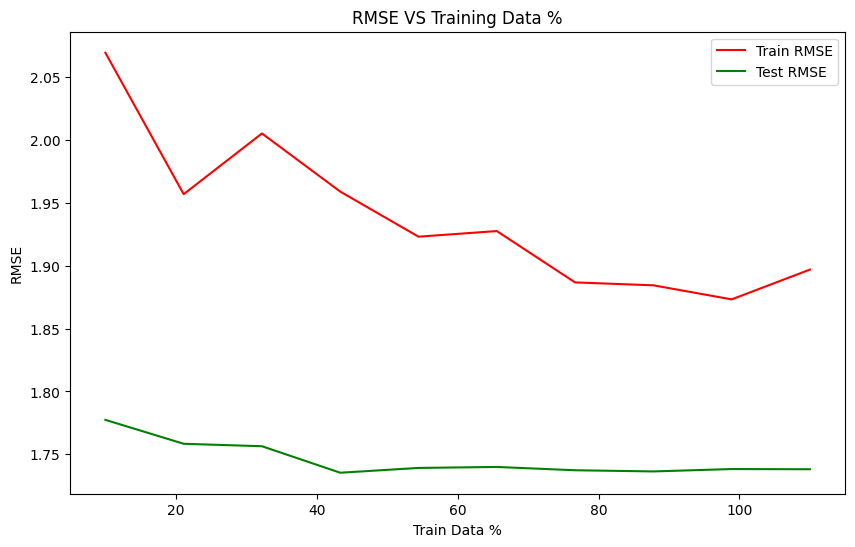

In [14]:
trainDataFraction = np.linspace(10, 110, 10)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(trainDataFraction, training_rmse, label='Train RMSE', color='red')
plt.plot(trainDataFraction, test_rmse, label='Test RMSE', color='green')

# plt.fill_between(dates[window_size - 1:], upper_band, lower_band, color='lightgray', alpha=0.4, label='Bollinger Bands')
plt.title('RMSE VS Training Data %')
plt.xlabel('Train Data %')
plt.ylabel('RMSE')
plt.legend()
plt.show()